In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
csvs = glob('../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/*.csv')
csvs

['../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/curve_PC.csv',
 '../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/hardrat_HARD_PC.csv',
 '../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/hardrat_HR_PC.csv',
 '../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/hardrat_SOFT_PC.csv']

In [4]:
for csv in csvs:
    print(csv)
    df = pd.read_csv(csv)
    print(df)

../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/curve_PC.csv
              MJD     T_+ve     T_-ve      Rate   Ratepos   Rateneg     obsID
0    55432.311882  0.005398 -0.005398  0.045060  0.008054 -0.008054  31791002
1    55436.731035  0.143181 -0.143181  0.044572  0.003750 -0.003750  31791003
2    55440.307721  0.106760 -0.106760  0.033776  0.003418 -0.003418  31791004
3    55444.258531  0.298326 -0.298326  0.038393  0.004323 -0.004323  31791005
4    55448.437838  0.073180 -0.073180  0.030707  0.003674 -0.003674  31791006
..            ...       ...       ...       ...       ...       ...       ...
218  59078.922063  0.004730 -0.004730  0.028628  0.006869 -0.006869  31791086
219  59204.263733  0.008851 -0.008851  0.024076  0.004584 -0.004584  31791109
220  59584.580466  0.005253 -0.005253  0.017348  0.005732 -0.004722  31791144
221  59587.961683  0.009489 -0.009489  0.028137  0.004819 -0.004819  31791145
222  59594.336264  0.009214 -0.009214  0.017618  0.003985 -0.003985  31791146

[223

In [5]:
df_full = pd.read_csv('../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/curve_PC.csv', dtype={'obsID':'string'})
df_full

,MJD,T_+ve,T_-ve,Rate,Ratepos,Rateneg,obsID
0,55432.311882,0.005398,-0.005398,0.045060,0.008054,-0.008054,00031791002
1,55436.731035,0.143181,-0.143181,0.044572,0.003750,-0.003750,00031791003
2,55440.307721,0.106760,-0.106760,0.033776,0.003418,-0.003418,00031791004
3,55444.258531,0.298326,-0.298326,0.038393,0.004323,-0.004323,00031791005
4,55448.437838,0.073180,-0.073180,0.030707,0.003674,-0.003674,00031791006
...,...,...,...,...,...,...,...
218,59078.922063,0.004730,-0.004730,0.028628,0.006869,-0.006869,00031791086
219,59204.263733,0.008851,-0.008851,0.024076,0.004584,-0.004584,00031791109
220,59584.580466,0.005253,-0.005253,0.017348,0.005732,-0.004722,00031791144
221,59587.961683,0.009489,-0.009489,0.028137,0.004819,-0.004819,00031791145


In [6]:
csvs = ['../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/hardrat_HARD_PC.csv', '../UKSSDC/NAME_NGC_7793_P13/USERPROD_45636/lc/hardrat_SOFT_PC.csv']
dfs = [pd.read_csv(csv, dtype={'obsID':'string'}) for csv in csvs]

In [7]:
for df in dfs:
    print(df.columns)
    

Index(['MJD', 'Err (pos)', 'Err(neg)', 'Rate', 'Error', 'obsID'], dtype='object')
Index(['MJD', 'Err (pos)', 'Err(neg)', 'Rate', 'Error', 'obsID'], dtype='object')


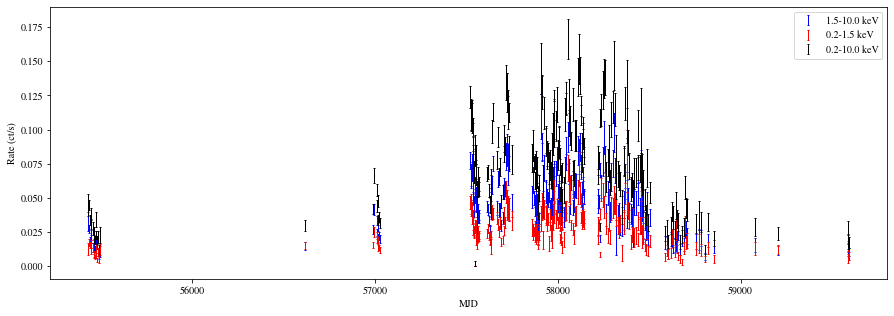

In [8]:
plt.figure(figsize=(15,5))
colors = ['blue', 'red']
labels = ['1.5-10.0 keV', '0.2-1.5 keV']
for i, df in enumerate(dfs):
    plt.errorbar(df['MJD'], df['Rate'], yerr=df['Error'], ls='none', color=colors[i], capsize=1.0, lw=1.0, label=labels[i])
    
    
    plt.ylabel('Rate (ct/s)')
    plt.xlabel('MJD')
    
plt.errorbar(df_full['MJD'], df_full['Rate'], yerr=(df_full['Rateneg'].abs(), df_full['Ratepos']), ls='none', color='black', capsize=1.0, lw=1.0, label='0.2-10.0 keV')
plt.legend()

Text(0, 0.5, 'Soft Count Rate')

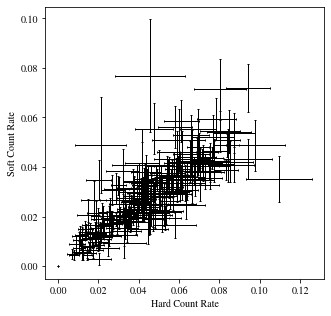

In [9]:
plt.figure(figsize=(5,5))
plt.errorbar(dfs[0]['Rate'], dfs[1]['Rate'], xerr=dfs[0]['Error'], yerr=dfs[1]['Error'], ls='none', color='black', capsize=1.0, lw=1.0)
plt.xlabel('Hard Count Rate')
plt.ylabel('Soft Count Rate')

In [10]:
from astropy.timeseries import lombscargle

In [11]:
df

,MJD,Err (pos),Err(neg),Rate,Error,obsID
0,55432.311882,0.005398,-0.005398,0.012584,0.004263,00031791002
1,55436.731035,0.143181,-0.143181,0.017438,0.002346,00031791003
2,55440.307721,0.106760,-0.106760,0.015310,0.002292,00031791004
3,55444.258531,0.298326,-0.298326,0.016093,0.002799,00031791005
4,55448.437838,0.073180,-0.073180,0.011047,0.002217,00031791006
...,...,...,...,...,...,...
218,59078.922063,0.004730,-0.004730,0.012810,0.004591,00031791086
219,59204.263733,0.008851,-0.008851,0.012424,0.003297,00031791109
220,59584.580466,0.005253,-0.005253,0.005633,0.003005,00031791144
221,59587.961683,0.009489,-0.009489,0.014801,0.003499,00031791145


In [12]:
uv = Table.read('../download_scripts/NGC7793/src_maghist_all.fits')
uv2 = Table.read('../download_scripts/NGC7793/src_uvotsource_all.fits')
uv

MET,EXTNAME,TSTART,TSTOP,EXPOSURE,TELAPSE,TIME,SRC_AREA,BKG_AREA,STD_AREA,PLATE_SCALE,RAW_TOT_CNTS,RAW_TOT_CNTS_ERR,RAW_BKG_CNTS,RAW_BKG_CNTS_ERR,RAW_STD_CNTS,RAW_STD_CNTS_ERR,RAW_TOT_RATE,RAW_TOT_RATE_ERR,RAW_BKG_RATE,RAW_BKG_RATE_ERR,RAW_STD_RATE,RAW_STD_RATE_ERR,COI_STD_FACTOR,COI_STD_FACTOR_ERR,COI_BKG_FACTOR,COI_BKG_FACTOR_ERR,COI_TOT_RATE,COI_TOT_RATE_ERR,COI_BKG_RATE,COI_BKG_RATE_ERR,COI_SRC_RATE,COI_SRC_RATE_ERR,AP_FACTOR,AP_FACTOR_ERR,AP_COI_SRC_RATE,AP_COI_SRC_RATE_ERR,LSS_FACTOR,LSS_RATE,LSS_RATE_ERR,SENSCORR_FACTOR,SENSCORR_RATE,SENSCORR_RATE_ERR,CORR_RATE,CORR_RATE_ERR,AB_MAG,AB_MAG_ERR,AB_MAG_ERR_STAT,AB_MAG_ERR_SYS,AB_MAG_BKG,AB_MAG_BKG_ERR_STAT,AB_MAG_BKG_ERR_SYS,AB_MAG_BKG_ERR,AB_MAG_LIM,AB_MAG_LIM_SIG,AB_MAG_COI_LIM,AB_FLUX_AA,AB_FLUX_AA_ERR_STAT,AB_FLUX_AA_ERR_SYS,AB_FLUX_AA_ERR,AB_FLUX_AA_BKG,AB_FLUX_AA_BKG_ERR_STAT,AB_FLUX_AA_BKG_ERR_SYS,AB_FLUX_AA_BKG_ERR,AB_FLUX_AA_LIM,AB_FLUX_AA_COI_LIM,AB_FLUX_HZ,AB_FLUX_HZ_ERR_STAT,AB_FLUX_HZ_ERR_SYS,AB_FLUX_HZ_ERR,AB_FLUX_HZ_BKG,AB_FLUX_HZ_BKG_ERR_STAT,AB_FLUX_HZ_BKG_ERR_SYS,AB_FLUX_HZ_BKG_ERR,AB_FLUX_HZ_LIM,AB_FLUX_HZ_COI_LIM,MAG,MAG_ERR,MAG_ERR_STAT,MAG_ERR_SYS,MAG_BKG,MAG_BKG_ERR_STAT,MAG_BKG_ERR_SYS,MAG_BKG_ERR,MAG_LIM,MAG_LIM_SIG,MAG_COI_LIM,FLUX_AA,FLUX_AA_ERR_STAT,FLUX_AA_ERR_SYS,FLUX_AA_ERR,FLUX_AA_BKG,FLUX_AA_BKG_ERR_STAT,FLUX_AA_BKG_ERR_SYS,FLUX_AA_BKG_ERR,FLUX_AA_LIM,FLUX_AA_COI_LIM,FLUX_HZ,FLUX_HZ_ERR_STAT,FLUX_HZ_ERR_SYS,FLUX_HZ_ERR,FLUX_HZ_BKG,FLUX_HZ_BKG_ERR_STAT,FLUX_HZ_BKG_ERR_SYS,FLUX_HZ_BKG_ERR,FLUX_HZ_LIM,FLUX_HZ_COI_LIM,COI_RATE_LIMIT,CORR_RATE_LIMIT,FILTER,RA,DEC,DETX,DETY,NSIGMA,FRAMTIME,SATURATED,SYS_ERR,OBSID
s,,s,s,s,s,s,arcsec2,arcsec2,arcsec2,arcsec / pix,ct,ct,ct,ct,ct,ct,ct / s,ct / s,ct / (arcsec2 s),ct / (arcsec2 s),ct / s,ct / s,,,,,ct / s,ct / s,ct / (arcsec2 s),ct / (arcsec2 s),ct / s,ct / s,,,ct / s,ct / s,,ct / s,ct / s,,ct / s,ct / s,ct / s,ct / s,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag,sigma,mag,erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A cm2 s),erg / (A cm2 s),mjy,mjy,mjy,mjy,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy,mjy,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag,sigma,mag,erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A cm2 s),erg / (A cm2 s),mjy,mjy,mjy,mjy,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy,mjy,ct / s,ct / s,,deg,deg,pix,pix,,s,,,
float64,bytes12,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float64,float64,float32,float32,float32,float32,int16,bool,bytes11
303612754.12798,uu303612607I,303612607.32396,303612900.932,288.97726,293.60803,147.12797611951828,78.656494,552.8655,78.656494,1.004,1089.012,32.31796,7042.588,82.29775,1089.012,32.31796,3.7685044,0.11183565,0.044080768,0.00051511574,3.7685044,0.11183565,1.0236394,0.031021463,1.0217131,0.012171506,3.8575895,0.11690451,0.045037895,0.0005365293,0.31506658,0.12428851,0.99989974,1.0013821,0.315035,0.12446029,0.9984566,0.31552196,0.12465268,

In [13]:
uv2

MET,EXTNAME,TSTART,TSTOP,EXPOSURE,TELAPSE,TIME,SRC_AREA,BKG_AREA,STD_AREA,PLATE_SCALE,RAW_TOT_CNTS,RAW_TOT_CNTS_ERR,RAW_BKG_CNTS,RAW_BKG_CNTS_ERR,RAW_STD_CNTS,RAW_STD_CNTS_ERR,RAW_TOT_RATE,RAW_TOT_RATE_ERR,RAW_BKG_RATE,RAW_BKG_RATE_ERR,RAW_STD_RATE,RAW_STD_RATE_ERR,COI_STD_FACTOR,COI_STD_FACTOR_ERR,COI_BKG_FACTOR,COI_BKG_FACTOR_ERR,COI_TOT_RATE,COI_TOT_RATE_ERR,COI_BKG_RATE,COI_BKG_RATE_ERR,COI_SRC_RATE,COI_SRC_RATE_ERR,AP_FACTOR,AP_FACTOR_ERR,AP_COI_SRC_RATE,AP_COI_SRC_RATE_ERR,LSS_FACTOR,LSS_RATE,LSS_RATE_ERR,SENSCORR_FACTOR,SENSCORR_RATE,SENSCORR_RATE_ERR,CORR_RATE,CORR_RATE_ERR,AB_MAG,AB_MAG_ERR,AB_MAG_ERR_STAT,AB_MAG_ERR_SYS,AB_MAG_BKG,AB_MAG_BKG_ERR_STAT,AB_MAG_BKG_ERR_SYS,AB_MAG_BKG_ERR,AB_MAG_LIM,AB_MAG_LIM_SIG,AB_MAG_COI_LIM,AB_FLUX_AA,AB_FLUX_AA_ERR_STAT,AB_FLUX_AA_ERR_SYS,AB_FLUX_AA_ERR,AB_FLUX_AA_BKG,AB_FLUX_AA_BKG_ERR_STAT,AB_FLUX_AA_BKG_ERR_SYS,AB_FLUX_AA_BKG_ERR,AB_FLUX_AA_LIM,AB_FLUX_AA_COI_LIM,AB_FLUX_HZ,AB_FLUX_HZ_ERR_STAT,AB_FLUX_HZ_ERR_SYS,AB_FLUX_HZ_ERR,AB_FLUX_HZ_BKG,AB_FLUX_HZ_BKG_ERR_STAT,AB_FLUX_HZ_BKG_ERR_SYS,AB_FLUX_HZ_BKG_ERR,AB_FLUX_HZ_LIM,AB_FLUX_HZ_COI_LIM,MAG,MAG_ERR,MAG_ERR_STAT,MAG_ERR_SYS,MAG_BKG,MAG_BKG_ERR_STAT,MAG_BKG_ERR_SYS,MAG_BKG_ERR,MAG_LIM,MAG_LIM_SIG,MAG_COI_LIM,FLUX_AA,FLUX_AA_ERR_STAT,FLUX_AA_ERR_SYS,FLUX_AA_ERR,FLUX_AA_BKG,FLUX_AA_BKG_ERR_STAT,FLUX_AA_BKG_ERR_SYS,FLUX_AA_BKG_ERR,FLUX_AA_LIM,FLUX_AA_COI_LIM,FLUX_HZ,FLUX_HZ_ERR_STAT,FLUX_HZ_ERR_SYS,FLUX_HZ_ERR,FLUX_HZ_BKG,FLUX_HZ_BKG_ERR_STAT,FLUX_HZ_BKG_ERR_SYS,FLUX_HZ_BKG_ERR,FLUX_HZ_LIM,FLUX_HZ_COI_LIM,COI_RATE_LIMIT,CORR_RATE_LIMIT,FILTER,RA,DEC,DETX,DETY,NSIGMA,FRAMTIME,SATURATED,SYS_ERR,OBSID
s,,s,s,s,s,s,arcsec2,arcsec2,arcsec2,arcsec / pix,ct,ct,ct,ct,ct,ct,ct / s,ct / s,ct / (arcsec2 s),ct / (arcsec2 s),ct / s,ct / s,,,,,ct / s,ct / s,ct / (arcsec2 s),ct / (arcsec2 s),ct / s,ct / s,,,ct / s,ct / s,,ct / s,ct / s,,ct / s,ct / s,ct / s,ct / s,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag,sigma,mag,erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A cm2 s),erg / (A cm2 s),mjy,mjy,mjy,mjy,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy,mjy,mag,mag,mag,mag,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag / arcsec2,mag,sigma,mag,erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A arcsec2 cm2 s),erg / (A cm2 s),erg / (A cm2 s),mjy,mjy,mjy,mjy,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy/arcsec2,mjy,mjy,ct / s,ct / s,,deg,deg,pix,pix,,s,,,
float64,bytes12,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float64,float64,float32,float32,float32,float32,int16,bool,bytes11
303612754.12798,uu303612607I,303612607.32396,303612900.932,288.97726,293.60803,0.0,78.656494,552.8655,78.656494,1.004,1089.012,32.31796,7042.588,82.29775,1089.012,32.31796,3.7685044,0.11183565,0.044080768,0.00051511574,3.7685044,0.11183565,1.0236394,0.031021463,1.0217131,0.012171506,3.8575895,0.11690451,0.045037895,0.0005365293,0.31506658,0.12428851,0.99989974,1.0013821,0.315035,0.12446029,0.9984566,0.31552196,0.12465268,1.0589457,0.334

In [14]:
uv = uv[uv['FILTER'] == 'U']
uv = uv[uv['AB_MAG'] != 99]

uv2 = uv2[uv2['FILTER'] == 'U']
uv2 = uv2[uv2['AB_MAG'] != 99]

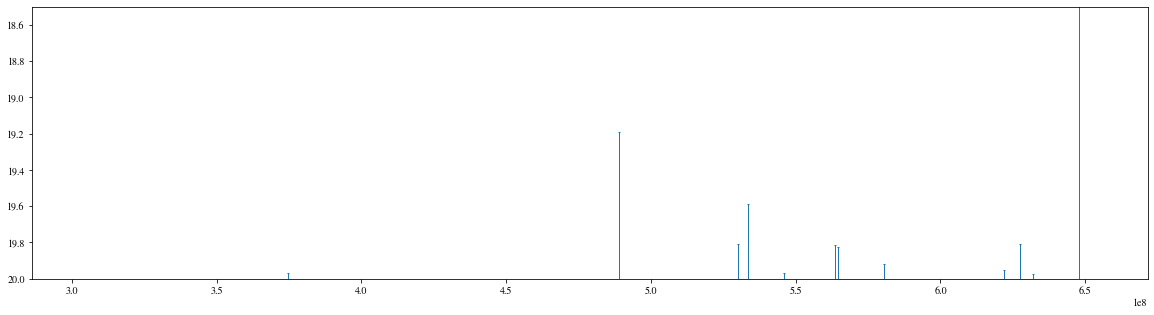

In [15]:
plt.figure(figsize=(20,5))

plt.errorbar(uv['MET'], uv['AB_MAG'], yerr=uv['AB_MAG_ERR'], ls='none', label='AB_MAG', lw=1.0, capsize=1.0)
#plt.errorbar(uv['MET'], uv['MAG'], yerr=uv['MAG_ERR'], ls='none', label='RAW_TOT_RATE', lw=1.0, capsize=1.0)
#plt.xlim(xmin=57500)
plt.ylim(18.5, 20)
plt.gca().invert_yaxis()

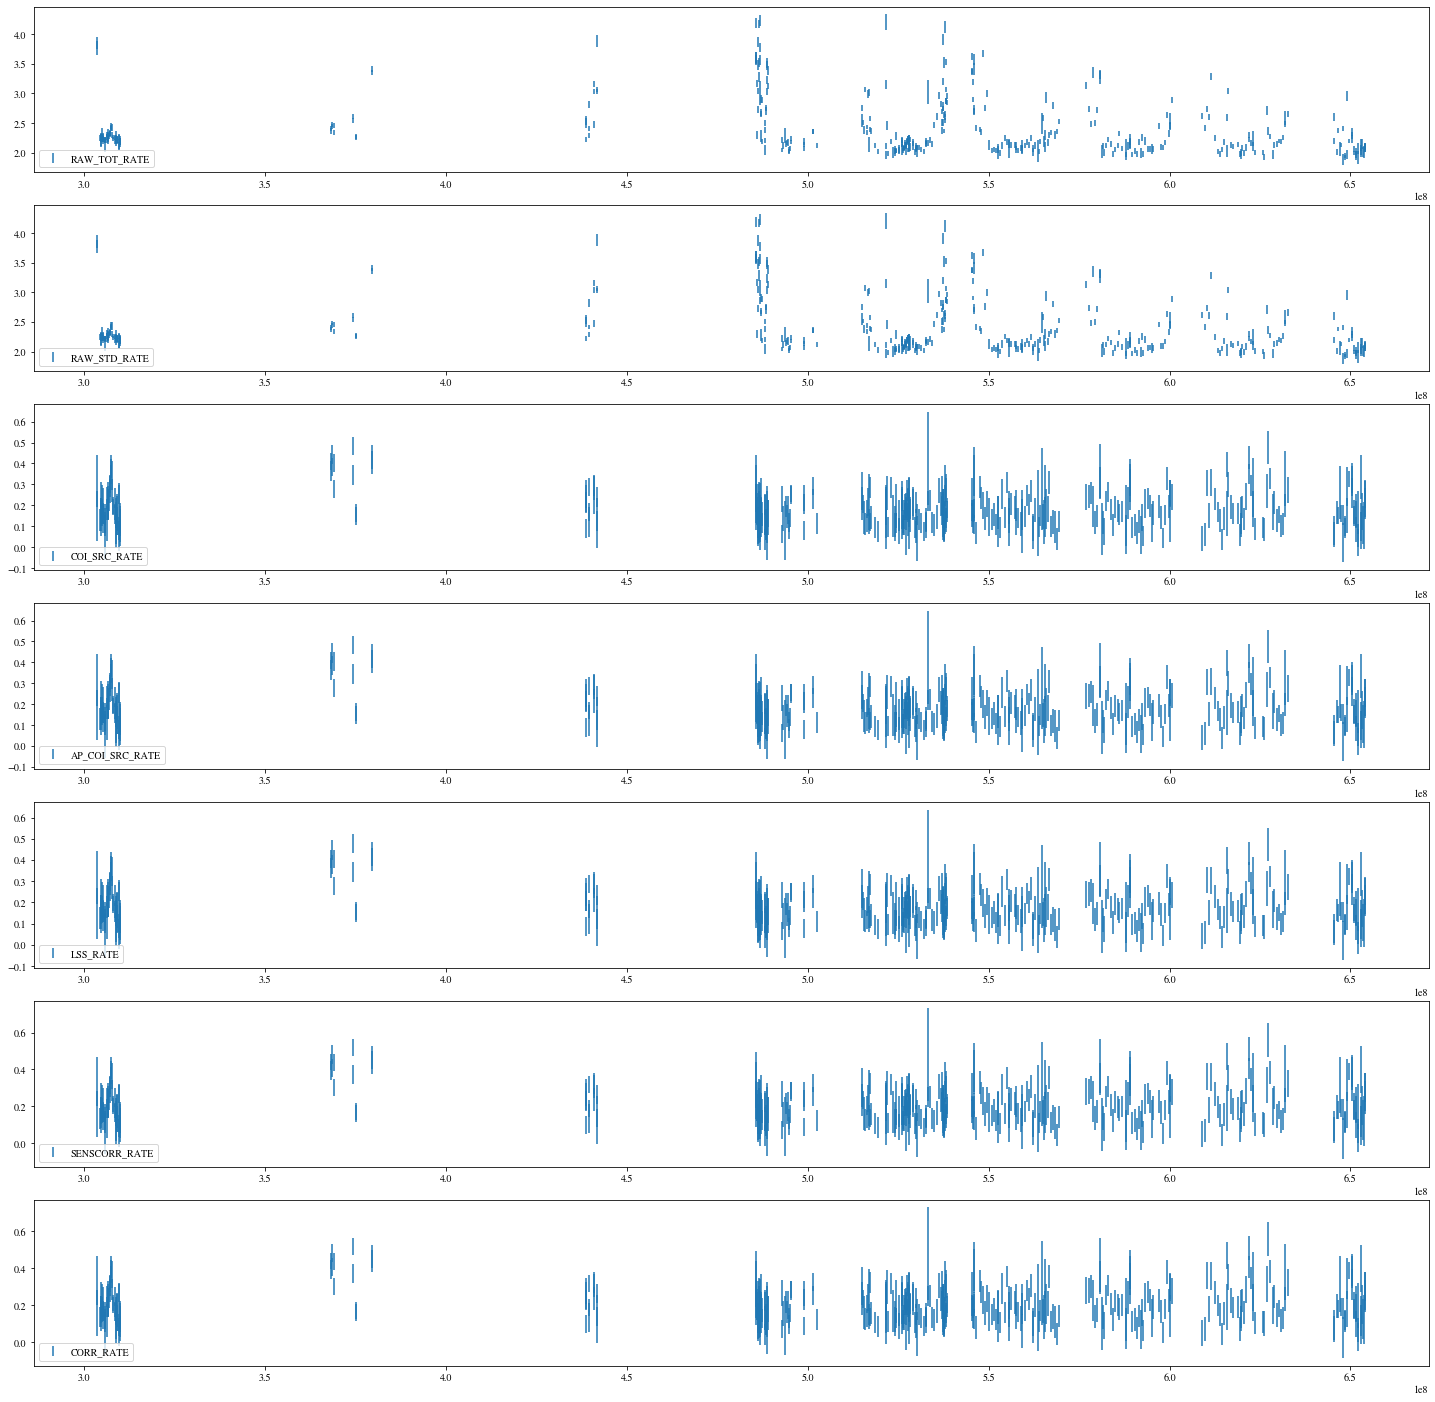

In [16]:
fig, ax = plt.subplots(7,1, figsize=(25,25))
ax[0].errorbar(uv['MET'], uv['RAW_TOT_RATE'], yerr=uv['RAW_TOT_RATE_ERR'], ls='none', label='RAW_TOT_RATE')
ax[1].errorbar(uv['MET'], uv['RAW_STD_RATE'], yerr=uv['RAW_STD_RATE_ERR'], ls='none', label='RAW_STD_RATE')
ax[2].errorbar(uv['MET'], uv['COI_SRC_RATE'], yerr=uv['COI_SRC_RATE_ERR'], ls='none', label='COI_SRC_RATE')
ax[3].errorbar(uv['MET'], uv['AP_COI_SRC_RATE'], yerr=uv['AP_COI_SRC_RATE_ERR'], ls='none', label='AP_COI_SRC_RATE')
ax[4].errorbar(uv['MET'], uv['LSS_RATE'], yerr=uv['LSS_RATE_ERR'], ls='none', label='LSS_RATE')
ax[5].errorbar(uv['MET'], uv['SENSCORR_RATE'], yerr=uv['SENSCORR_RATE_ERR'], ls='none', label='SENSCORR_RATE')
ax[6].errorbar(uv['MET'], uv['CORR_RATE'], yerr=uv['CORR_RATE_ERR'], ls='none', label='CORR_RATE')

for a in ax:
    a.legend(loc='lower left')


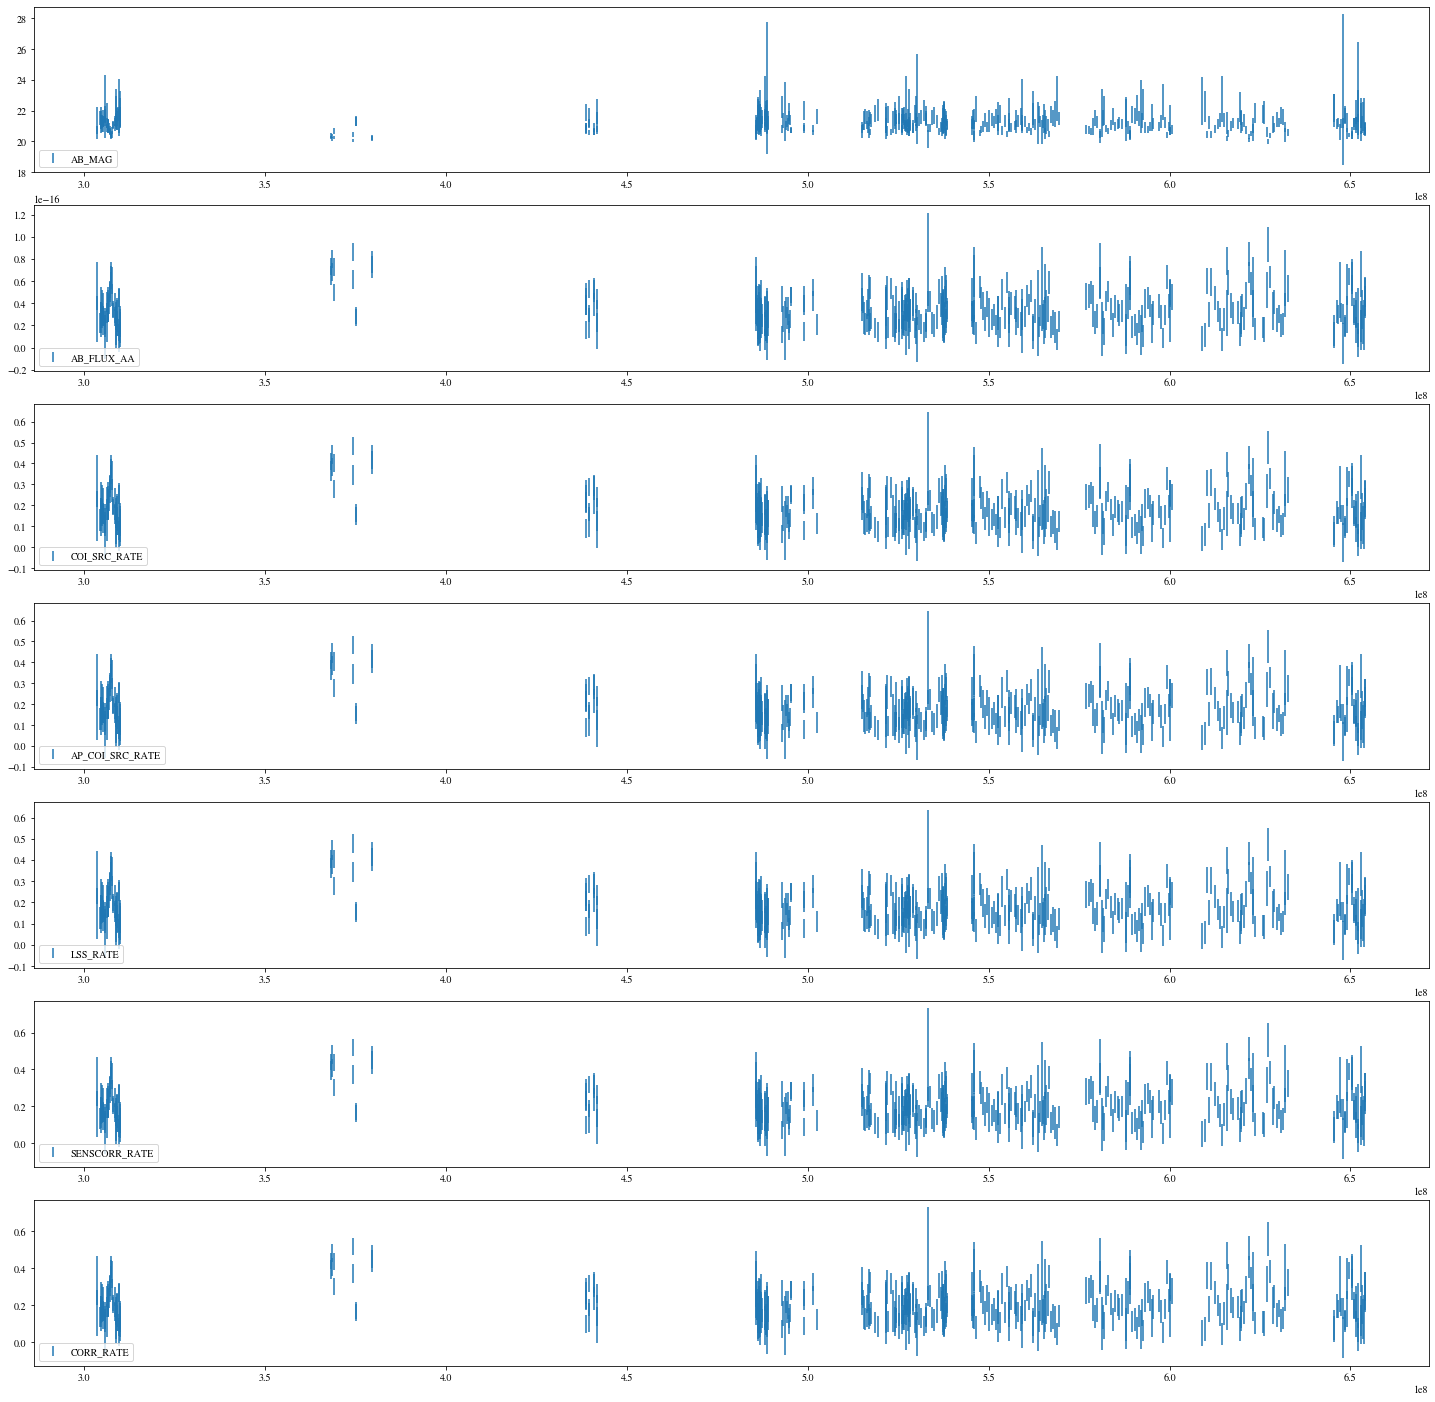

In [17]:
fig, ax = plt.subplots(7,1, figsize=(25,25))
ax[0].errorbar(uv['MET'], uv['AB_MAG'], yerr=uv['AB_MAG_ERR'], ls='none', label='AB_MAG')
ax[1].errorbar(uv['MET'], uv['AB_FLUX_AA'], yerr=uv['AB_FLUX_AA_ERR'], ls='none', label='AB_FLUX_AA')
ax[2].errorbar(uv['MET'], uv['COI_SRC_RATE'], yerr=uv['COI_SRC_RATE_ERR'], ls='none', label='COI_SRC_RATE')
ax[3].errorbar(uv['MET'], uv['AP_COI_SRC_RATE'], yerr=uv['AP_COI_SRC_RATE_ERR'], ls='none', label='AP_COI_SRC_RATE')
ax[4].errorbar(uv['MET'], uv['LSS_RATE'], yerr=uv['LSS_RATE_ERR'], ls='none', label='LSS_RATE')
ax[5].errorbar(uv['MET'], uv['SENSCORR_RATE'], yerr=uv['SENSCORR_RATE_ERR'], ls='none', label='SENSCORR_RATE')
ax[6].errorbar(uv['MET'], uv['CORR_RATE'], yerr=uv['CORR_RATE_ERR'], ls='none', label='CORR_RATE')

for a in ax:
    a.legend(loc='lower left')


In [18]:
from astropy.table import join

In [19]:
df.columns = ['MJD', 'Err (pos)', 'Err(neg)', 'Rate', 'Error', 'OBSID']

In [20]:
len(df)

223

In [21]:
len(uv)

428

In [22]:
df_join = join(Table.from_pandas(df), uv, keys='OBSID')


In [23]:

uv2['MJD'] = MJDREFI  + uv2['MET'] / 86400.0


NameError: name 'MJDREFI' is not defined

In [ ]:
plt.figure(figsize=(20,5))

#plt.errorbar(uv['MET'], uv['RAW_TOT_RATE'], yerr=uv['RAW_TOT_RATE_ERR'], marker='.', ls='none', label='RAW_TOT_RATE', lw=1.0, capsize=1.0, color='black')
plt.errorbar(uv['MET'], uv['AB_MAG'], yerr=uv['AB_MAG_ERR'], marker='.', ls='none', label='RAW_TOT_RATE', lw=1.0, capsize=1.0, color='black')
#plt.errorbar(df_join['MJD'], df_join['MAG'], yerr=df_join['MAG_ERR'], ls='none', label='RAW_TOT_RATE', lw=1.0, capsize=1.0)
#plt.errorbar(uv['MET'], uv['MAG'], yerr=uv['MAG_ERR'], ls='none', label='RAW_TOT_RATE', lw=1.0, capsize=1.0)
#plt.xlim(xmin=57500)
#plt.xlim(57500, 57500+1800)

#plt.ylim(18.5, 19.5)
plt.gca().invert_yaxis()

In [ ]:
len(np.unique(uv['OBSID']))

In [ ]:
len(df)

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(25,10))
ax[0].errorbar(df_join['MJD'], df_join['Rate'], yerr=df_join['Error'], lw=1.0, capsize=1.0, ls='none', label='XRT', marker='.', color='black')
ax[1].errorbar(df_join['MJD'], df_join['AB_MAG'], yerr=df_join['AB_MAG_ERR'], lw=1.0, capsize=1.0, ls='none', label='UV', marker='.', color='darkviolet')
ax[1].invert_yaxis()

for a in ax:
    a.legend()
    a.set_xlim(57500)
    
plt.savefig('../figures/7793_LC.png', facecolor='white')

In [ ]:

plt.figure(figsize=(10,10))
plt.errorbar(x=df_join['Rate'], xerr=df_join['Error'], y=df_join['SENSCORR_RATE'], yerr=df_join['SENSCORR_RATE_ERR'], ls='none', lw=1.0, capsize=1.0)

from scipy.optimize import curve_fit

def line(x, m, c):
    y = m*x+c
    return y

p_opt, p_cov = curve_fit(line, xdata=df_join['Rate'], ydata=df_join['SENSCORR_RATE'])
plt.plot(df_join['Rate'], line(df_join['Rate'], p_opt[0], p_opt[1]), color='red', label=fr'$y={p_opt[0]:.2f}x+{p_opt[1]:.2f}$')
plt.legend()

plt.figure(figsize=(10,10))
plt.errorbar(x=df_join['Rate'], xerr=df_join['Error'], y=df_join['AB_MAG'], yerr=df_join['AB_MAG_ERR'], ls='none', lw=1.0, capsize=1.0)

plt.figure(figsize=(10,10))
plt.errorbar(x=df_join['Rate'], xerr=df_join['Error'], y=df_join['RAW_TOT_RATE'], yerr=df_join['RAW_TOT_RATE_ERR'], ls='none', lw=1.0, capsize=1.0)



In [ ]:
plt.figure(figsize=(15,5))
plt.errorbar(df_join['MJD'], df_join['RAW_TOT_CNTS'], df_join['RAW_TOT_CNTS_ERR'], ls='none', lw=1.0, capsize=1.0)

In [ ]:
from astropy.timeseries import LombScargle

In [ ]:
plt.figure(figsize=(20,5))
freq, power = LombScargle(df_join['MJD'], df_join['RAW_TOT_CNTS']).autopower()
plt.plot(1/freq, power)
freq, power = LombScargle(df_join['MJD'], df_join['AB_MAG']).autopower()
plt.plot(1/freq, power)
freq, power = LombScargle(df_join['MJD'], df_join['Rate']).autopower()
plt.plot(1/freq, power)

plt.ylim(0,0.1)
plt.xlim(0,100)

In [ ]:
xdata = df_join['Rate']
xerr  = df_join['Error']
ydata = df_join['SENSCORR_RATE']
yerr  = df_join['SENSCORR_RATE_ERR']

In [ ]:
from scipy import odr

def line(B, x):
    return B[0]*x + B[1]

linear = odr.Model(line)
mydata = odr.RealData(xdata, ydata, sx=xerr, sy=yerr)
myodr  = odr.ODR(mydata, linear, beta0=[1., 2.])


myoutput = myodr.run()
myoutput.pprint()

# prepare confidence level curves
nstd = 5. # to draw 5-sigma intervals
beta_upper = myoutput.beta + nstd * myoutput.sd_beta
beta_lower = myoutput.beta - nstd * myoutput.sd_beta

xfit = np.linspace(xdata.min(), xdata.max(),100)
yfit = line(myoutput.beta, xfit)
yfit_upper = line(beta_upper, xfit)
yfit_lower = line(beta_lower, xfit)



plt.figure(figsize=(8,8))
plt.errorbar(xdata, ydata, xerr=xerr, yerr=yerr, lw=1.0, capsize=1.0, color='black', ls='none')
plt.fill_between(xfit, yfit_upper, yfit_lower, alpha=.25, label='5-sigma interval')
plt.plot(xfit, yfit, color='red', label=f'y={myoutput.beta[0]:.2f}x + {myoutput.beta[1]:.2f}')
plt.legend()

In [ ]:
xfit

In [ ]:
xdata.min()

In [ ]:
# Looking at the data from felix

In [ ]:
tab_xrt  = Table.read('../external/7793_lc_furst.fits', hdu=1)
tab_uvot = Table.read('../external/7793_lc_furst.fits', hdu=4)
df_xrt   = tab_xrt.to_pandas()
df_uvot  = tab_uvot.to_pandas()

In [ ]:
df_join2 = pd.merge_asof(df_xrt, df_uvot, on='mjd')

In [ ]:
bin_low  = df_join2['rate'].min()
bin_high = df_join2['rate'].max()
nbins = 10
rate_bins = np.linspace(bin_low, bin_high, nbins)
bin_step = (bin_high - bin_low) / nbins

all_rows = []

for bin_low in rate_bins:
    row = {}
    bin_high = bin_low + bin_step
    sub = df_join2[(df_join2['rate'] > bin_low) & (df_join2['rate'] < bin_high)]
    n = len(sub)
    rate_mean = np.mean(sub['rate'])
    rate_sigma = np.std(sub['rate'])
    rate_se  =  rate_sigma / np.sqrt(n)

    mag_mean = np.mean(sub['mag'])
    mag_sigma = np.std(sub['mag'])
    mag_se = mag_sigma / np.sqrt(n)

    row['rate_bin_low'] = bin_low
    row['rate_bin_high'] = bin_high
    row['rate_bin_step'] = bin_step
    row['rate_n_bins'] = nbins
    row['rate_bin_step'] = bin_step

    row['n'] = n
    row['rate_mean'] = rate_mean
    row['rate_sigma'] = rate_sigma
    row['rate_se'] = rate_se
    row['mag_mean'] = mag_mean
    row['mag_sigma'] = mag_sigma
    row['mag_se'] = mag_se
    all_rows.append(row)

df = pd.DataFrame(all_rows)
df

In [ ]:
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

def line(x, m, c):
    return m*x+c


df = df[df['n'] != 0]
p_opt, p_cov = curve_fit(line, df['rate_mean'], df['mag_mean'], sigma=df['mag_sigma'])
r, p_val = pearsonr(df['rate_mean'], df['mag_mean'])

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title(f'NGC7793 P13 | ndata={len(df_join2)} \n r={r:.2f} p_val={p_val:.4f}')
ax.scatter(df_join2['rate'], df_join2['mag'], marker='x', c=df_join2.index.values)
ax.errorbar(df['rate_mean'], df['mag_mean'], xerr=df['rate_se'], yerr=df['mag_se'], ls='none', lw=1.0, capsize=1.0, color='black')
xlow, xhigh = ax.get_xlim()[0], ax.get_xlim()[1]
xrange = np.linspace(xlow, xhigh, 100)
ax.plot(xrange, line(xrange, p_opt[0], p_opt[1]), color='red', label=f'y={p_opt[0]:.2f}x+{p_opt[1]:.2f}')
ax.set_xlim(xlow, xhigh)
ax.set_xlabel('XRT RATE (ct/s)')
ax.set_ylabel('UVOT MAG (mag)')
ax.legend()
plt.savefig('../figures/7793_corr_FURST.png')

In [ ]:
uv3 = uv2[uv2['EXTNAME'] != 'U']
uv4 = uv2[uv2['EXTNAME'] == 'U']

fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)

ax[0].set_ylim(18,23)
ax[0].errorbar(uv4['MJD'], uv4['MAG'], yerr=uv4['MAG_ERR'], lw=1.0, ls='none', capsize=1.0, marker='.', label='uvotsource')
ax[1].errorbar(tab_uvot['mjd'], tab_uvot['mag'], yerr=(tab_uvot['mag_err']), lw=1.0, ls='none', capsize=1.0, marker='.', label='Fuerst')
#ax[1].errorbar(uv3['MJD'], uv3['MAG'], yerr=uv3['MAG_ERR'], lw=1.0, ls='none', capsize=1.0, marker='.', label='uvotsource extname!=u')

for a in ax:
    a.legend()
    a.set_xlabel('MJD')
    a.set_ylabel('UVOT mag')
    a.legend()
    
plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.savefig('../figures/7793_lc_comparison.png', facecolor='white')

In [ ]:
tab_uvot['tstart'].name = 'TSTART'

In [ ]:
uvot_join = join(uv4, tab_uvot, keys='TSTART')
uvot_join['diff_mag'] = uvot_join['mag'] - uvot_join['AB_MAG']


In [ ]:
tab_uvot

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(20,10))
ax[0].errorbar(uvot_join['MJD'], uvot_join['mag'], uvot_join['mag_err'], ls='none', lw=1.0, marker='.', capsize=1.0, label='Fuerst 7793')
ax[1].errorbar(uvot_join['MJD'], uvot_join['AB_MAG'], uvot_join['AB_MAG_ERR'], ls='none', lw=1.0, marker='.', capsize=1.0, label='UVOTSOURCE 7793')
ax[2].scatter(uvot_join['MJD'], uvot_join['diff_mag'], label='Furest - uvotsource', marker='x')
for a in ax:
    a.legend()
    a.set_xlabel('MJD')
    a.set_ylabel('UVOT mag')
plt.savefig('../figures/furst_lc_comparison.png', facecolor='white')

In [ ]:
for x-ray observation where we do not detect the source, use the upper limit as the data point for the flux

In [ ]:
Table

In [ ]:
tab = Table.read('../download_scripts/NGC7793/00046280004/sw00046280004xpcw3po_cl.evt.gz')
tab

In [ ]:
plt.figure(figsize=(9,8))

#plt.scatter(tab['X'], tab['Y'], marker='x', c=tab['PHA'])
#plt.scatter(tab['X'], tab['Y'], marker='x', c=tab['PHA'], cmap='hot')
sub = tab[(tab['X']>540) & (tab['X']<580) & (tab['Y']>500) & (tab['Y']<540)]
plt.scatter(sub['X'], sub['Y'], marker='x', c=sub['PHA'], cmap='hot')
plt.colorbar()

In [ ]:
sub['TIME_DIFF'] = np.insert(np.diff(sub['TIME'].value),0, values=0)
plt.scatter(sub['TIME'], sub['TIME_DIFF'], marker='x')
plt.ylim(0,300)

In [ ]:
uv['MAG', 'MAG_LIM', 'NSIGMA']

In [ ]:
import sys
from glob import glob
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

import data
from source_names_dict import source_names_dict, source_names_readable
from get_closest_srcreg import get_src_region_dict

In [ ]:
simbad_name = 'NAME_NGC_7793_P13'
src_region_dict = get_src_region_dict()
#tab = data.load_joined(simbad_name='Holmberg_II_X-1', xrt_curve='HARD', uvot_filter='U', src_region_dict=src_region_dict, join_hr=True)
tab = data.load_joined(simbad_name=simbad_name, xrt_curve='PC', uvot_filter='U', src_region_dict=src_region_dict, join_hr=True)
tab.sort('MJD_0')


tab = data.load_joined(simbad_name=simbad_name, xrt_curve='PC', uvot_filter='U', src_region_dict=src_region_dict, join_hr=True)
tab.sort('MJD_0')

fig, ax = plt.subplots(2,1, figsize=(20,10), sharex=True)
ax[0].errorbar(tab['MJD'], tab['MAG'], yerr=uvot_err, ls='none', color='purple', lw=1.0, capsize=1.0)
ax[0].set_ylim(18.5, 21.5)
ax[0].invert_yaxis()

ax[1].errorbar(tab['MJD'], tab['RATE_1'], yerr=tab['RATE_ERR_1'], ls='none', color='black', lw=1.0, capsize=0.0, marker='s', markersize=2)
ax[1].set_ylim(0, 0.225)

ax[0].set_xlim(55400)
plt.subplots_adjust(hspace=0)